# Walmart Store Sales Prediction

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [10]:
train=pd.read_csv('../6. WALMART STORE PREDICTION - FORECASTING/data/train.csv')
test=pd.read_csv('../6. WALMART STORE PREDICTION - FORECASTING/data/test.csv')
store=pd.read_csv('../6. WALMART STORE PREDICTION - FORECASTING/data/stores.csv')
feature=pd.read_csv('../6. WALMART STORE PREDICTION - FORECASTING/data/features.csv')

In [11]:
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
print(test.shape)
test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [13]:
print(store.shape)
store.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
print(feature.shape)
feature.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [79]:
# merge the datasets
train_merged=pd.merge(train,feature, on=['Store','Date'], how='inner')
train_merged=pd.merge(train_merged,store,on='Store',how='inner')
train_merged.drop(['IsHoliday_y'], axis=1, inplace=True)
train_merged.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace=True)

In [37]:
test_merged=pd.merge(test,feature, on=['Store','Date'], how='inner')
test_merged=pd.merge(test_merged,store,on='Store',how='inner')
test_merged.drop(['IsHoliday_y'], axis=1, inplace=True)
test_merged.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace=True)
print(test_merged.shape)

(115064, 15)


In [26]:
print(train_merged.shape)
train_merged.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [27]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [28]:
train_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


## Missing Values

In [59]:
#missing values
train_merged.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

Markdown data is only available after Nov 2011 and is not available for all stores all the time. Hence, instead of imputing these missing values, we will create flags to indicate its availability and fill all NAs with 0.

In [80]:
train_merged = train_merged.assign(md1_present = train_merged.MarkDown1.notnull())
train_merged = train_merged.assign(md2_present = train_merged.MarkDown2.notnull())
train_merged = train_merged.assign(md3_present = train_merged.MarkDown3.notnull())
train_merged = train_merged.assign(md4_present = train_merged.MarkDown4.notnull())
train_merged = train_merged.assign(md5_present = train_merged.MarkDown5.notnull())
train_merged.fillna(0, inplace=True)

In [40]:
#missing values
test_merged.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [42]:
test_merged = test_merged.assign(md1_present = test_merged.MarkDown1.notnull())
test_merged = test_merged.assign(md2_present = test_merged.MarkDown2.notnull())
test_merged = test_merged.assign(md3_present = test_merged.MarkDown3.notnull())
test_merged = test_merged.assign(md4_present = test_merged.MarkDown4.notnull())
test_merged = test_merged.assign(md5_present = test_merged.MarkDown5.notnull())

test_merged.CPI.fillna(test_merged.CPI.median(), inplace=True)
test_merged.Unemployment.fillna(test_merged.Unemployment.median(), inplace=True)
test_merged.fillna(0, inplace=True)

## Outliers

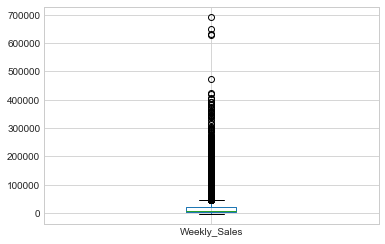

In [81]:
train_merged.Weekly_Sales.plot(kind='box')

-25109.653749999998 47395.15625


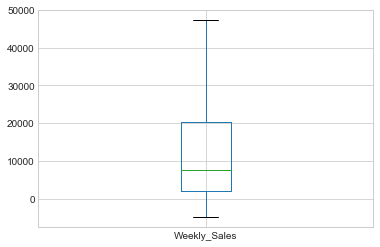

In [84]:
q25, q75 = train_merged.Weekly_Sales.quantile([0.25,0.75])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min,max)
train_merged.Weekly_Sales = np.where(train_merged.Weekly_Sales>max, max, train.Weekly_Sales)
#train_merged.Weekly_Sales = np.where(train_merged.Weekly_Sales<min, min, train.Weekly_Sales)
train_merged.Weekly_Sales.plot(kind='box')

In [85]:
train_merged.Weekly_Sales.describe()

count    421570.000000
mean      13649.405016
std       14908.783751
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max       47395.156250
Name: Weekly_Sales, dtype: float64

### Multi-collinearity

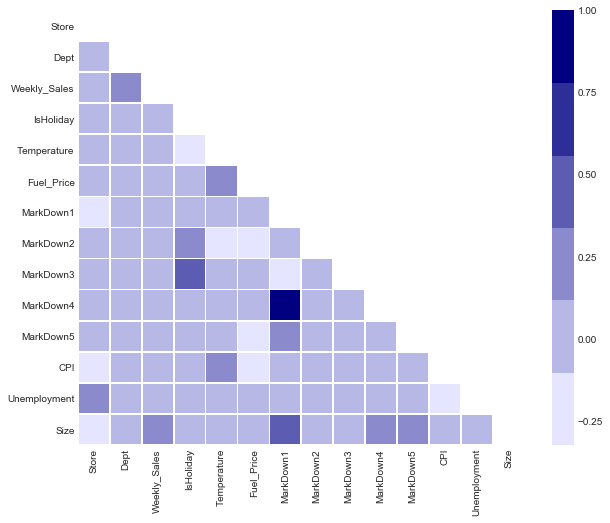

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(train_merged.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_merged.corr(), mask=mask, cmap=sns.light_palette("navy"), linewidths=.75)

MarkDown1 is highly correlated with MarkDown4

### Key Visualizations

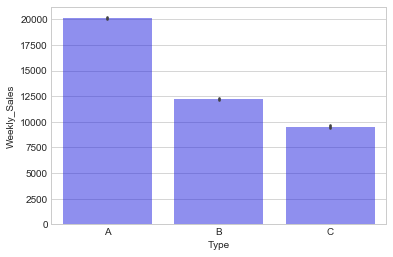

In [34]:
sns.barplot(train_merged['Type'], train_merged['Weekly_Sales'],alpha=0.5,color='blue')

Store Type C has the lowest sales

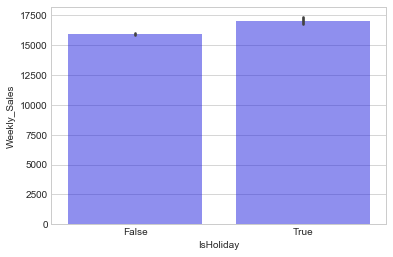

In [35]:
sns.barplot(train_merged['IsHoliday'], train_merged['Weekly_Sales'],alpha=0.5,color='blue')

Sales are higher during holidays

### Preparing for the modeling

In [102]:
# convert booleans to binary
train_merged.IsHoliday = train_merged.IsHoliday.astype(int)
train_merged.md1_present = train_merged.md1_present.astype(int)
train_merged.md2_present = train_merged.md2_present.astype(int)
train_merged.md3_present = train_merged.md3_present.astype(int)
train_merged.md4_present = train_merged.md4_present.astype(int)
train_merged.md5_present = train_merged.md5_present.astype(int)

test_merged.IsHoliday = test_merged.IsHoliday.astype(int)
test_merged.md1_present = test_merged.md1_present.astype(int)
test_merged.md2_present = test_merged.md2_present.astype(int)
test_merged.md3_present = test_merged.md3_present.astype(int)
test_merged.md4_present = test_merged.md4_present.astype(int)
test_merged.md5_present = test_merged.md5_present.astype(int)

In [106]:
train_merged['Type'] = LabelEncoder().fit_transform(train_merged['Type'])
test_merged['Type'] = LabelEncoder().fit_transform(test_merged['Type'])

In [89]:
# Drop Markdown 4 basis multi-collinearity check
train_merged = train_merged.drop(['MarkDown4'],axis=1)

In [107]:
# Extract Months and add that as a feature to capture seasonality
train_merged['Date'] = pd.to_datetime(train_merged['Date'])
train_merged['Month'] = train_merged['Date'].dt.month

test_merged['Date'] = pd.to_datetime(test_merged['Date'])
test_merged['Month'] = test_merged['Date'].dt.month

### Splitting the train data further into train and test

In [110]:
X = train_merged.drop(['Date', 'Weekly_Sales'], axis=1)
Y = train_merged.Weekly_Sales
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.70, random_state=7)
sc = StandardScaler().fit(train_X)
sc_train = sc.transform(train_X)
sc_test = sc.transform(test_X)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Building Models

### Random Forest

In [113]:
rf = RandomForestRegressor(n_estimators=10, max_depth=15, min_samples_split=10).fit(sc_train,train_Y)

In [115]:
print(np.sqrt(mean_squared_error(rf.predict(sc_train),train_Y)))
print(np.sqrt(mean_squared_error(rf.predict(sc_test),test_Y)))

4895.354488852894
5245.040152586333


In [117]:
rf_test_pred = pd.DataFrame( { 'actual':  test_Y,
                            'predicted': rf.predict(sc_test) } )

In [121]:
rf_test_pred.head()

,actual,predicted
347476,1007.73000,1221.243499
141283,2166.48000,7303.656619
211171,5893.54000,4777.747620
241734,2088.00000,4312.233198
274487,47395.15625,45282.190573


### Feature Importance

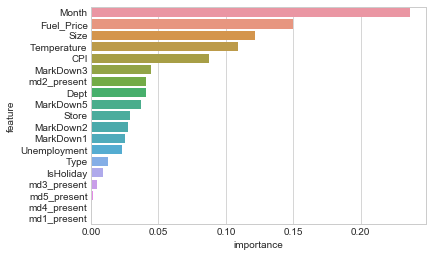

In [124]:
indices = np.argsort(rf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         rf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

### Linear Regression

In [127]:
lm = LinearRegression().fit(sc_train,train_Y)
print(np.sqrt(mean_squared_error(lm.predict(sc_train),train_Y)))
print(np.sqrt(mean_squared_error(lm.predict(sc_test),test_Y)))

13356.544325445851
13414.251215087408


Random Forest has produced better RMSE than Linear Regression

### Let's now try Random Forest once again by taking advantage of the Feature Importance obtained from previous Random Forest

In [128]:
X = train_merged.drop(['Date', 'Weekly_Sales', 'md1_present', 'md4_present', 'md5_present', 'md3_present', 
                       'IsHoliday', 'Type', 'Unemployment', 'MarkDown1', 'MarkDown2'], axis=1)
Y = train_merged.Weekly_Sales
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.70, random_state=7)
sc = StandardScaler().fit(train_X)
sc_train = sc.transform(train_X)
sc_test = sc.transform(test_X)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [131]:
rf = RandomForestRegressor(n_estimators=10, max_depth=15, min_samples_split=10).fit(sc_train,train_Y)
print(np.sqrt(mean_squared_error(rf.predict(sc_train),train_Y)))
print(np.sqrt(mean_squared_error(rf.predict(sc_test),test_Y)))

4887.436664548147
5232.119593205511


In [132]:
rf_test_pred = pd.DataFrame( { 'actual':  test_Y,
                            'predicted': rf.predict(sc_test) } )
rf_test_pred.head()

,actual,predicted
347476,1007.73000,1096.576665
141283,2166.48000,7278.822600
211171,5893.54000,4352.619036
241734,2088.00000,4090.425608
274487,47395.15625,44697.547125


## Predicting Weekly Sales value on test data

In [133]:
test = sc.transform(test_merged[X.columns])

In [134]:
prediction = pd.concat([test_merged.Store.astype(str), test_merged.Dept.astype(str), test_merged.Date.astype(str),
           pd.DataFrame(rf.predict(test))], axis=1)

In [135]:
prediction.columns = ['Store', 'Dept', 'Date', 'Weekly_Sales']

In [136]:
prediction.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2012-11-02,6269.967606
1,1,2,2012-11-02,6269.967606
2,1,3,2012-11-02,6269.967606
3,1,4,2012-11-02,6269.967606
4,1,5,2012-11-02,6269.967606


In [137]:
prediction.to_csv('Walmart_Store_Sales_Prediction.csv', index=0)